In [18]:
import sympy as sp

In [19]:
from sympy.physics.vector import init_vprinting
init_vprinting(use_latex='mathjax', pretty_print=False)

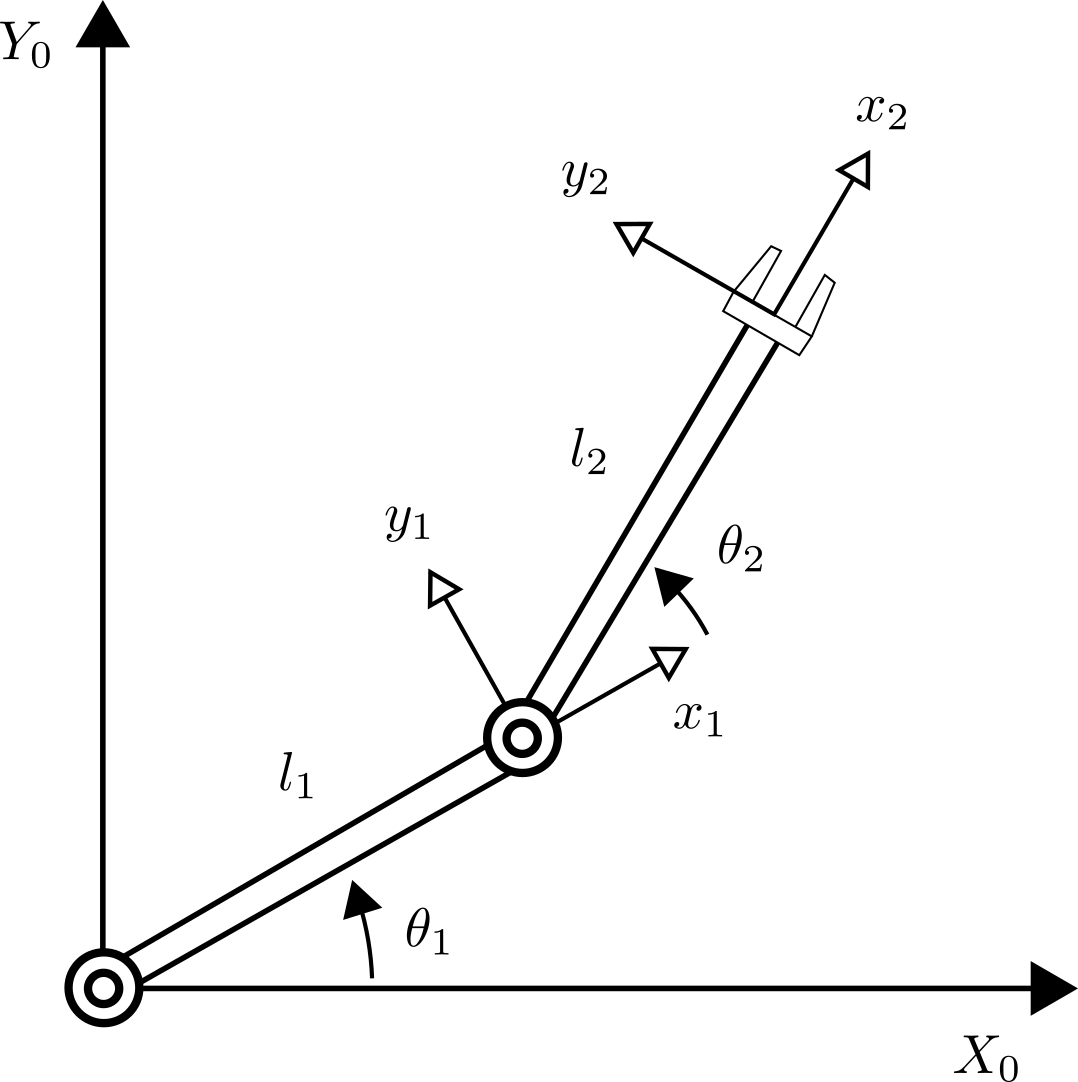

In [20]:
from IPython.display import Image
Image('fig/2rp_new.png', width=300)

In [21]:
from sympy.physics.mechanics import dynamicsymbols

In [22]:
theta1, theta2, l1, l2, theta, alpha, a, d = dynamicsymbols('theta1 theta2 l1 l2 theta alpha a d')
theta1, theta2, l1, l2, theta, alpha, a, d 

(theta1, theta2, l1, l2, theta, alpha, a, d)

In [23]:
rot = sp.Matrix([[sp.cos(theta), -sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha)],
                 [sp.sin(theta), sp.cos(theta)*sp.cos(alpha), -sp.cos(theta)*sp.sin(alpha)],
                 [0, sp.sin(alpha), sp.cos(alpha)]])

trans = sp.Matrix([a*sp.cos(theta), a*sp.sin(theta),d])

last_row = sp.Matrix([[0, 0, 0, 1]])

m = sp.Matrix.vstack(sp.Matrix.hstack(rot, trans), last_row)
m

Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(alpha)*sin(theta), a*cos(theta)],
[sin(theta),  cos(alpha)*cos(theta), -sin(alpha)*cos(theta), a*sin(theta)],
[         0,             sin(alpha),             cos(alpha),            d],
[         0,                      0,                      0,            1]])

In [25]:
# Transformation: frame '0' to '1'

m01 = m.subs({alpha:0, a:l1, theta: theta1, d:0})
m01

Matrix([
[cos(theta1), -sin(theta1), 0, l1*cos(theta1)],
[sin(theta1),  cos(theta1), 0, l1*sin(theta1)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [28]:
# Transformation: frame '1' to '2'

m12 = m.subs({alpha:0, a:l2, theta: theta2, d:0})
m12

Matrix([
[cos(theta2), -sin(theta2), 0, l2*cos(theta2)],
[sin(theta2),  cos(theta2), 0, l2*sin(theta2)],
[          0,            0, 1,              0],
[          0,            0, 0,              1]])

In [29]:
# Homogenous transformation: frame '0' to '2'

m02 = (m01*m12)
m02

Matrix([
[-sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), -sin(theta1)*cos(theta2) - sin(theta2)*cos(theta1), 0, l1*cos(theta1) - l2*sin(theta1)*sin(theta2) + l2*cos(theta1)*cos(theta2)],
[ sin(theta1)*cos(theta2) + sin(theta2)*cos(theta1), -sin(theta1)*sin(theta2) + cos(theta1)*cos(theta2), 0, l1*sin(theta1) + l2*sin(theta1)*cos(theta2) + l2*sin(theta2)*cos(theta1)],
[                                                 0,                                                  0, 1,                                                                        0],
[                                                 0,                                                  0, 0,                                                                        1]])

In [31]:
# simplify the transformation as

mbee = sp.Matrix([[m02[0,0].simplify(), m02[0,1].simplify(), sp.trigsimp(m02[0,3].simplify())],
                  [m02[1,0].simplify(), m02[1,1].simplify(), sp.trigsimp(m02[1,3].simplify())],
                  [m02[2,0].simplify(), m02[2,1].simplify(), m02[2,2].simplify() ]])

mbee

Matrix([
[cos(theta1 + theta2), -sin(theta1 + theta2), l1*cos(theta1) + l2*cos(theta1 + theta2)],
[sin(theta1 + theta2),  cos(theta1 + theta2), l1*sin(theta1) + l2*sin(theta1 + theta2)],
[                   0,                     0,                                        1]])

In [33]:
# Forward Kinematic Equations

# position in x-direction

px = mbee[0,2]
px

l1*cos(theta1) + l2*cos(theta1 + theta2)

In [34]:
# position in y-direction

py = mbee[1,2]
py

l1*sin(theta1) + l2*sin(theta1 + theta2)

In [35]:
# Evaluation of tip position

fx = sp.lambdify([l1, l2, theta1, theta2], px, 'numpy')
fy = sp.lambdify([l1, l2, theta1, theta2], py, 'numpy')

In [42]:
# plotting tip position in X & Y Plane

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
d2r = np.deg2rad

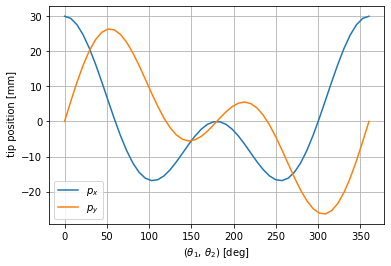

In [44]:
theta1s = np.linspace(d2r(0), d2r(360)) #desired range of motion for joint 1
theta2s = np.linspace(d2r(0), d2r(360)) #desired range of motion for joint 2

zx = np.array(fx(15.0, 15.0, theta1s, theta2s))
zy = np.array(fy(15.0, 15.0, theta1s, theta2s))

fig, ax1 = plt.subplots()
ax1.plot(np.rad2deg(theta1s), zx, label = r'$p_x$')
ax1.plot(np.rad2deg(theta1s), zy, label = r'$p_y$')
ax1.set_xlabel(r'($\theta_1$, $\theta_2$) [deg]')
ax1.set_ylabel(r' tip position [mm]')
plt.legend()
plt.grid()

In [103]:
# Manipulator Workspace

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) # for offline mode in Jupyter Notebook use

import plotly.offline as py
import plotly.graph_objs as go
from numpy import cos, sin

In [104]:
theta11 = np.linspace(d2r(0), d2r(90))
theta22 = np.linspace(d2r(0), d2r(360))
theta1, theta2 = np.meshgrid(theta11, theta22)
l_range = [5]

px1 = {}
py1 = {}
pz1 = {}
for i in l_range:
    l1 = i
    l2 = i-4
    
    pxa = l1*cos(theta1) + l2*cos(theta1 + theta2)
    pya = l1*sin(theta1) + l2*sin(theta1 + theta2)
    
    px1[f'x{i}'] = pxa
    py1[f'x{i}'] = pya

In [105]:
pxx = px1['x5']
pyy = px1['x5']
pzz = pyy*0 #dummy zero points for z-axis, as it doesn't exist

In [106]:
trace1 = go.Surface(z=pzz, x= pxx, y=pyy,
                    colorscale='Reds',
                    showscale=False,
                    opacity=0.7,
                   )
data = [trace1]

In [107]:
layout = go.Layout(scene=dict(xaxis = dict(title='X (mm)'),
                              yaxis = dict(title='Y (mm)'),
                              zaxis = dict(title='Z (mm)'),
                             ),
                  )

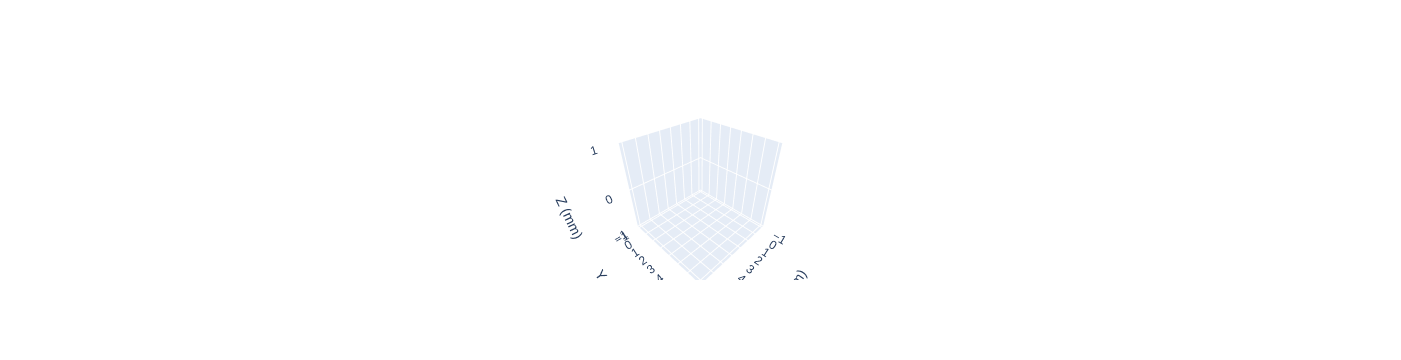

In [108]:
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)